# Dividir el Dataset en conjunto de entreinamiento y de testing 

Hay que ver si el modelo si ajusta demasiodo bien a los datos que tenemos, pero no se adapta a otros datos => overfitting 

Por eso dividimos los datos en una parte de entreinamiento y una de verificacion 

Hay que asegurarse de una homogeneidad de los dos conguntos. 

Otro modo mas robusto es utilizar el proceso de Crossvalidation (veremos luego)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("C://Users/Jo_Revenge/Documents/GitHub/python-ml-course/datasets/ads/Advertising.csv")

 ## Como dividir el dataset

In [6]:
a = np.random.randn(len(data))

(array([ 3.,  8., 14., 26., 42., 36., 38., 18., 11.,  4.]),
 array([-2.53490695, -2.05063674, -1.56636652, -1.08209631, -0.59782609,
        -0.11355588,  0.37071433,  0.85498455,  1.33925476,  1.82352497,
         2.30779519]),
 <a list of 10 Patch objects>)

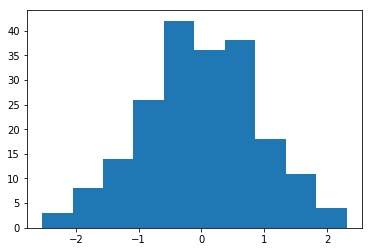

In [8]:
plt.hist(a)

In [11]:
check = (a<0.8)
training = data[check] #tenemos aproximadamente 80% en entreinamiento y 20% en testing
testing = data[~check]

In [13]:
len(training), len(testing)

(165, 35)

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     775.7
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.06e-83
Time:                        19:34:54   Log-Likelihood:                -316.27
No. Observations:                 165   AIC:                             638.5
Df Residuals:                     162   BIC:                             647.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0934      0.308     10.036      0.000       2.485       3.702
TV             0.0463      0.002     30.176      0.000       0.043       0.049
Radio          0.1824      0.009     20.598      0.000       0.165       0.200
==============================================================================
Omnibus:                       61.190   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.358
Skew:                          -1.483   Prob(JB):                     5.62e-41
Kurtosis:                       7.262   Cond. No.                         407.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validacion del modelo de testing con el conjuntode testing

In [19]:
sales_pred = lm.predict(testing) #Aqui estoy usando el conjunto de testing 
sales_pred

0      20.630699
1      12.319842
6      11.735545
25     15.891571
35     17.286826
38      9.956890
41     17.372149
48     16.483839
50     12.900083
51      9.488170
61     22.967518
64     16.963692
66      9.037329
69     21.128161
75     11.845821
81     14.932577
83     14.373739
88     11.828624
104    20.366955
107     7.329357
112    14.028880
113    16.545300
131    15.888513
133    19.369993
134    11.840646
138     9.806348
142    19.347650
153    18.257609
158    10.365011
166    10.779453
174    14.000107
187    17.167044
196     8.344141
197    12.976388
199    15.397219
dtype: float64

In [21]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

114.64623841226367

In [22]:
RSE = np.sqrt(SSD/(len(testing)-3))
RSE

1.892800821635293

In [23]:
sales_m = np.mean(testing["Sales"])
error = RSE/sales_m
error # Vemos que los valores aqui son muy parecidos a los que hemos visto con todos los datos. Esto nos dice que el modelo no sufre de overfitting 

0.13634087004987702